# Impact of Loan Features on Borrower Rate and Lender Yield
## by Flavian Kyande

## Investigation Overview

In this research, I wanted to find out loan features that impact the borrower rate and lender yield. The main features were income range, loan status and score rating.


## Dataset Overview

The dataset contained 113,937 personal loan records with 81 variables in each loan record which included the main features. I cleaned the data after finding outliers that had a massive impact on the data visualization.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_context('notebook', rc={"font.size":12,"axes.titlesize":16,"axes.labelsize":12})
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data\prosperLoanData.csv')

# removing borrower records > 25000 and IncomeRange == Not Displayed & Not Employed
df = df.query('StatedMonthlyIncome <= 25000 & IncomeRange != ["Not employed", "Not displayed", "$0"]')

In [3]:
# replacing past due values with one value
past_due = ['Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']

df['LoanStatus'] = df['LoanStatus'].replace(past_due, 'Past Due')

In [4]:
# changing LoanStatus, ProsperScore and IncomeRange into ordered categorical data types
ordered_category_dict = {'LoanStatus' : ['Cancelled', 'Chargedoff', 'Completed', 'Current', 'Defaulted',
                 'FinalPayementProgress', 'Past Due'],
                 'ProsperScore' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                 'IncomeRange' : ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+',]}

for i in ordered_category_dict:
    ordered_category = pd.api.types.CategoricalDtype(ordered=True, categories=ordered_category_dict[i])
    df[i] = df[i].astype(ordered_category)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Lender Yield and Borrower Rate

The LenderYield has a multi modal distribution. There are many peaks in the distribution. There is a huge spike around 0.31 meaning lenders yielded this rate more. BorrowerRate shares a similar distribution to LenderYield, a multimodal distribution with multiple peaks. The highest peak rate also appears around 0.32.

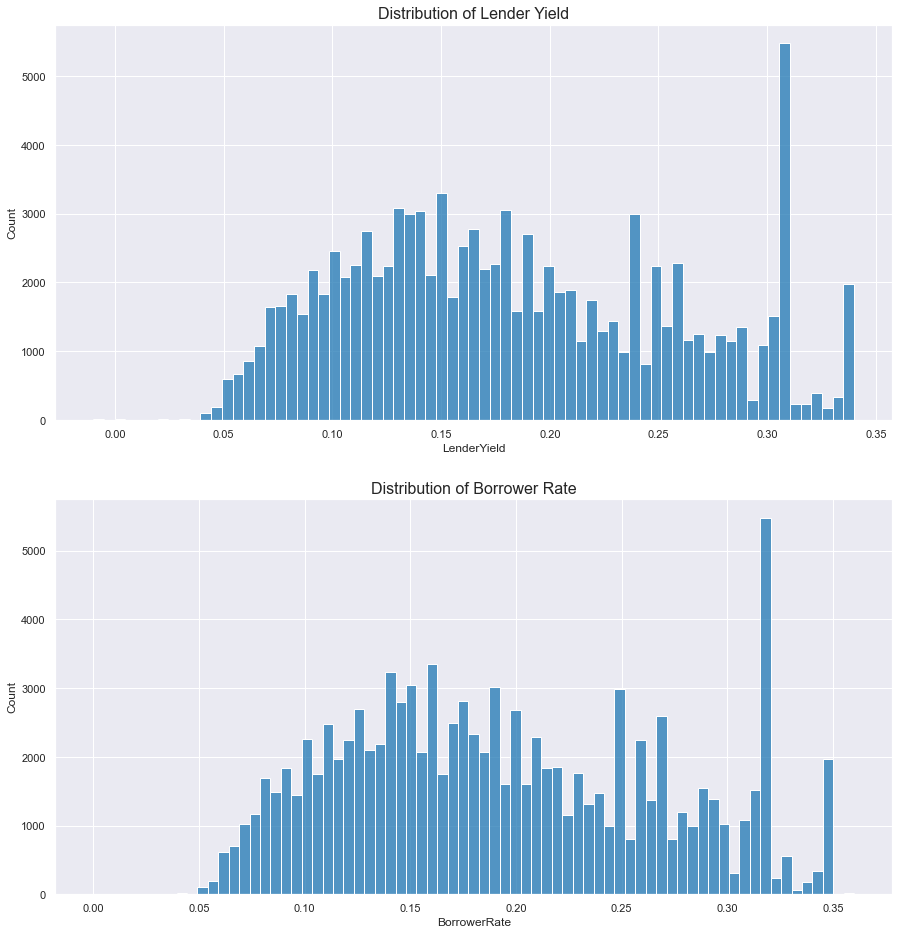

In [5]:
fig, ax = plt.subplots(nrows=2, figsize=(15, 16))
sns.histplot(df['LenderYield'], ax=ax[0]).set(title='Distribution of Lender Yield')
sns.histplot(df['BorrowerRate'], ax=ax[1]).set(title='Distribution of Borrower Rate');

## Relationship between Borrow Rate and Lender Yield

There is a strong positive correlation between BorrowerRate and LenderYield. This means that as the borrower rate increases the lenders get a higher yield.

[Text(0.5, 1.0, 'Relationship between BorrowRate and LenderYield')]

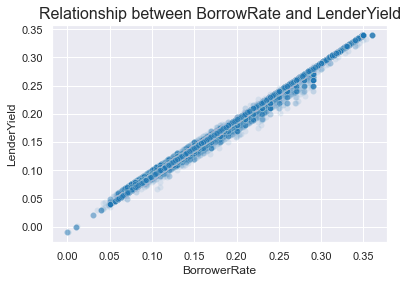

In [6]:
# scatter plot
sns.scatterplot(data = df, x = 'BorrowerRate', y='LenderYield', alpha = 0.1)\
    .set(title='Relationship between BorrowRate and LenderYield')

## Borrower Rate vs Lender Yield in the Two Main Feature Levels

There is a strong positive correlation in every level of the variables. As the BorrowerRate increases, the LenderYield also increases in each level. BorrowerRate is a good predictor of LenderYield and vice versa.
The trend can be witnessed after plotting against two different levels. This signifies that both BorrowerRate and LenderYield are strongly and positively correlated.

In [7]:
def disgrid(x, y, **kwargs):
    """Creating distribution grids with seaborn"""
    palette = kwargs.pop('color')
    plt.hist2d(x, y, bins=20, cmap = palette, cmin = 0.5)

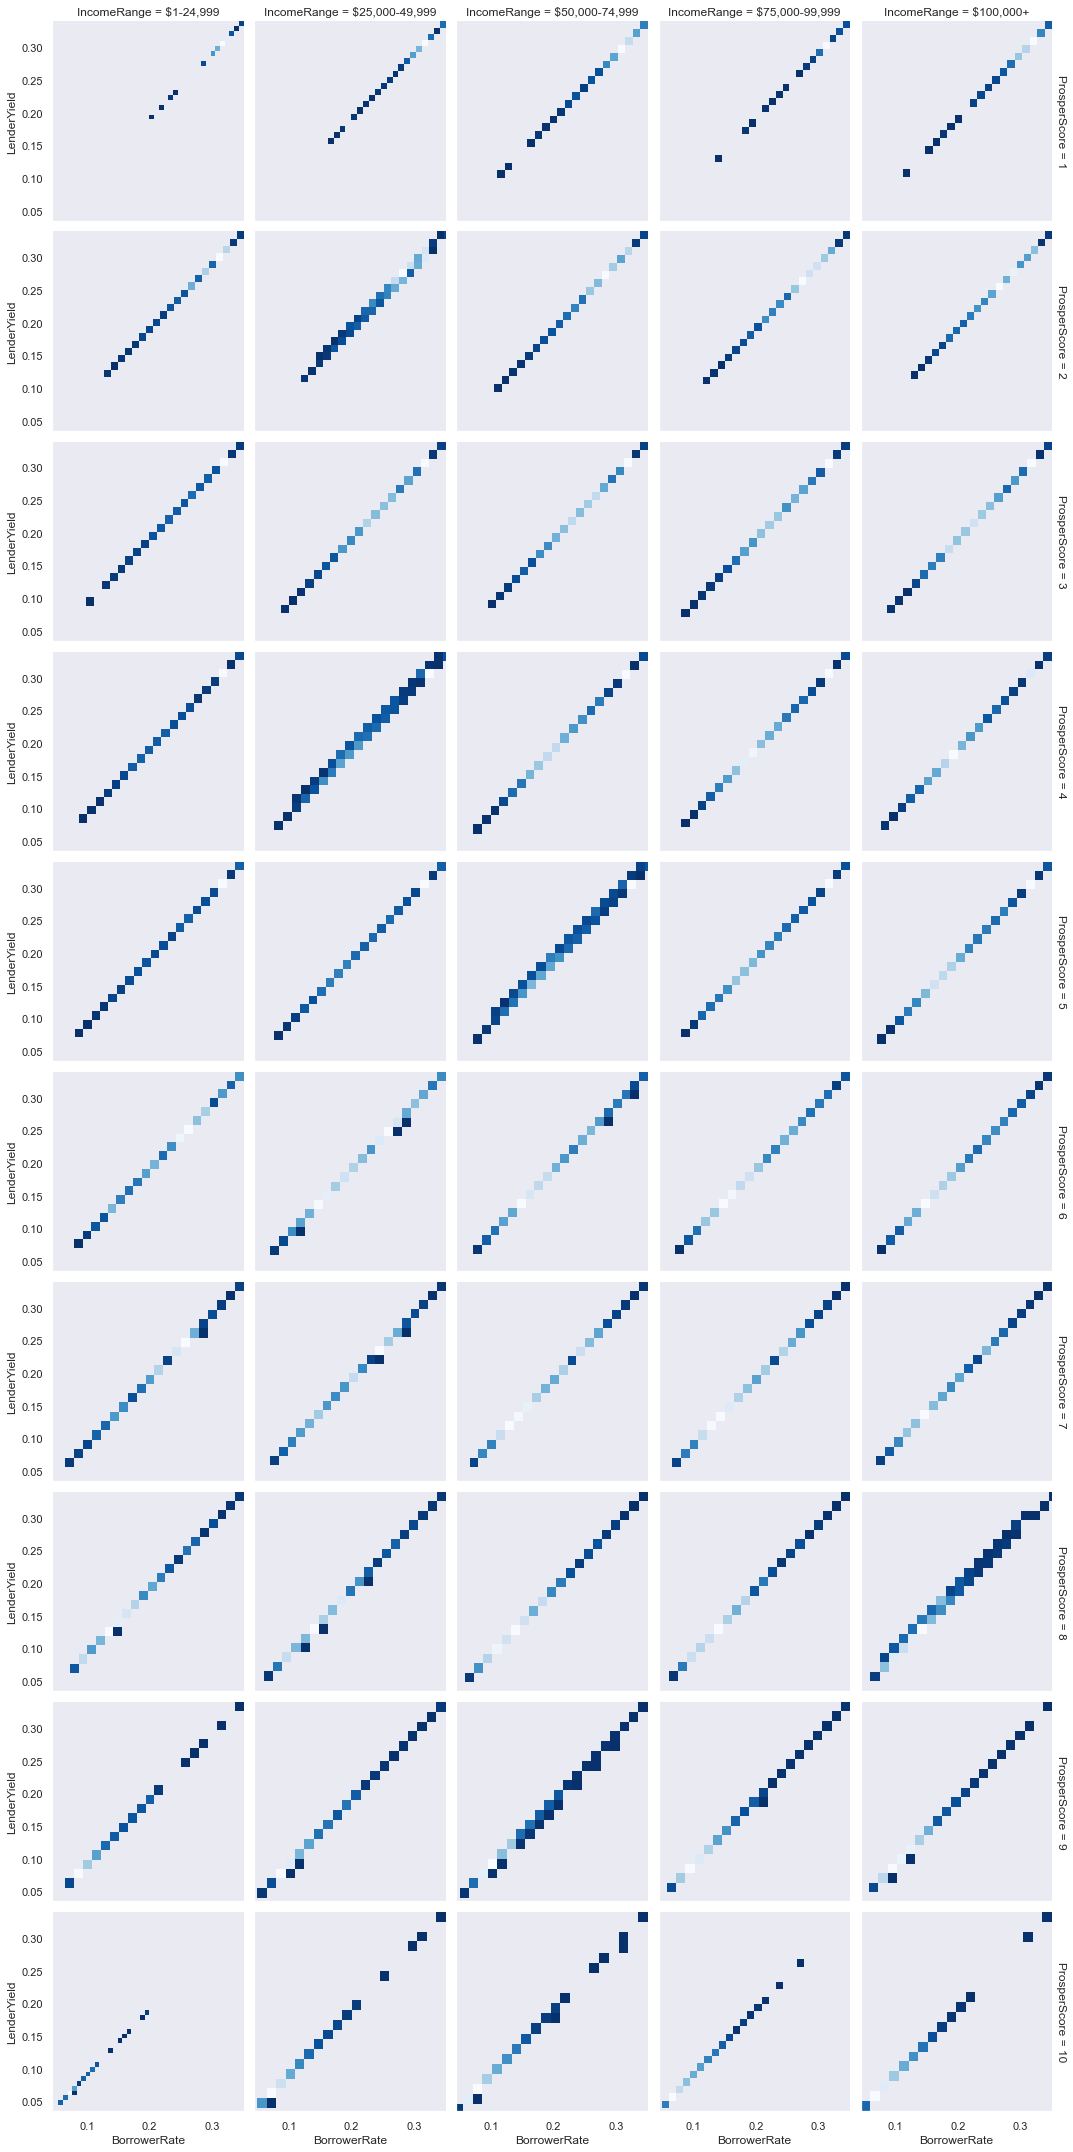

In [8]:
p = sns.FacetGrid(data = df, col = 'IncomeRange', row = 'ProsperScore', margin_titles = True)
p.map(disgrid, 'BorrowerRate', 'LenderYield', color='Blues_r')
p.set_xlabels('BorrowerRate')
p.set_ylabels('LenderYield')

In [9]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 761293 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Flavian\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Flavian\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\Flavian\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Flavian\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Flavian\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filen